<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Installing Modules

In [ ]:
#Installing the libraries with the specified version.
#!pip install tensorflow==2.16.1 --user

## Importing necessary libraries

In [1]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.
from sklearn.preprocessing import StandardScaler  # For scaling/normalizing the data

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.

from imblearn.over_sampling import SMOTE  # To oversample the data

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
keras.utils.set_random_seed(812)

tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [3]:
# read the data
df = pd.read_csv("Churn.csv")

In [4]:
# Let's also create a copy, just in case we want to work out look back at the original dataframe or restore from it.
data = df.copy()

## Data Overview

In [5]:
# To find the shape of the Dataframe (number of records & number of variables)
data.shape

(10000, 14)

In [6]:
# returns the first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Now we can check the different independent features available in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Let's list the distinct value counts for each of the columns with Object datatype.
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


In [9]:
# making sure there are no duplicate records
data.duplicated().sum()

0

In [10]:
# Getting a count of null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Let's look at the statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [12]:
# Dropping RowNumber & CustomerId columns as these are only unique identifiers & wouldn't help in Model building
data.drop(["RowNumber"], axis=1, inplace=True)
data.drop(["CustomerId"], axis=1, inplace=True)

# We can also drop the Surname column as anybody's surname shouldn't signify if the user will attrite,
# this in fact can create a really negative prejudice in the model for certain surnames, that's highly undesirable:
data.drop(["Surname"], axis=1, inplace=True)

In [13]:
# Let's look at the statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [14]:
# data[data['EstimatedSalary']<3000 & 
tempdf = data[data['EstimatedSalary']<3000]
tempdf[tempdf['Balance']>100000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
195,807,France,Male,35,3,174790.15,1,1,1,600.36,0
361,643,Germany,Female,45,2,150842.93,1,0,1,2319.96,1
551,674,Germany,Male,47,6,106901.94,1,1,1,2079.20,1
591,700,France,Male,38,8,134811.30,1,1,0,1299.75,0
753,815,Germany,Male,37,2,110777.26,2,1,0,2383.59,0
...,...,...,...,...,...,...,...,...,...,...,...
9555,782,Germany,Female,72,5,148666.99,1,1,0,2605.65,1
9636,648,Germany,Female,40,5,139973.65,1,1,1,667.66,1
9811,645,Germany,Female,31,1,128927.93,1,1,1,2850.01,0
9920,678,France,Female,49,3,204510.94,1,0,1,738.88,1


In [15]:
del tempdf

In [16]:
print("Unique values in Exited are : ")
print(data['Exited'].value_counts())

Unique values in Exited are : 
Exited
0    7963
1    2037
Name: count, dtype: int64


### Observations so far..
* The dataset has ***10000*** records having ***14*** attributes / features.
* Only 3 columns (**Surname**, **Geography** & **Gender**) are of the datatype 'object', out of which **Geography** & **Gender** seems to be categorical in nature.
* **Geography** for most of the customers (around 50%) is ***France*** along with people from ***Germany*** & ***Spain*** being the remaining 50%.
* **Gender** for ~55% of the customer base is ***Male***, with the number of ***Females*** being ~45%.
* There doesn't seem to be any duplicated records or records having null values.
* The columns **RowNumber** & **CustomerId** doesn't seem to be adding any values as they are only unique identifiers for any given customer and doesn't really seem to have any impact of whether the user would attrite or not, so dropping these 2 columns to avoid any unnecessary biases.
* The **CreditScore** of the users seems to range from a really low ***350*** to the best score of ***850***.
* Minimum **Age** for a customer of the Bank seems to be ***18***, with customers of up to ***92*** yrs old.
* The oldest customer of the Bank seems to be associated with them for around ***10*** years **Tenure**.
* **Balance** for the customers seems to be highly skewed with customers ranging from ***0*** balance all the way up to ***over 250k***.
* **Salary** seems highly skewed as well with the lowest salary being under ***12*** and highest being around ***200k***. However, looking at the Bank Balance of these customers with low incomes, we can see that many of them are having very high Bank Balance, but very low salaries reported.
	* This could mean that the users have most likely not updated their salaries correctly in the Bank records, causing such discrepancies.
* Customers seems to have anywhere between ***1*** and ***4*** count of the **NumOfProducts**.
* Taking a quick look at the target variable **Exited**, we can see that around ***80%*** of the customers didn't exit and around ***20%*** of the customers seems to have exited.

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

### Let's build Histograms for all Numeric columns

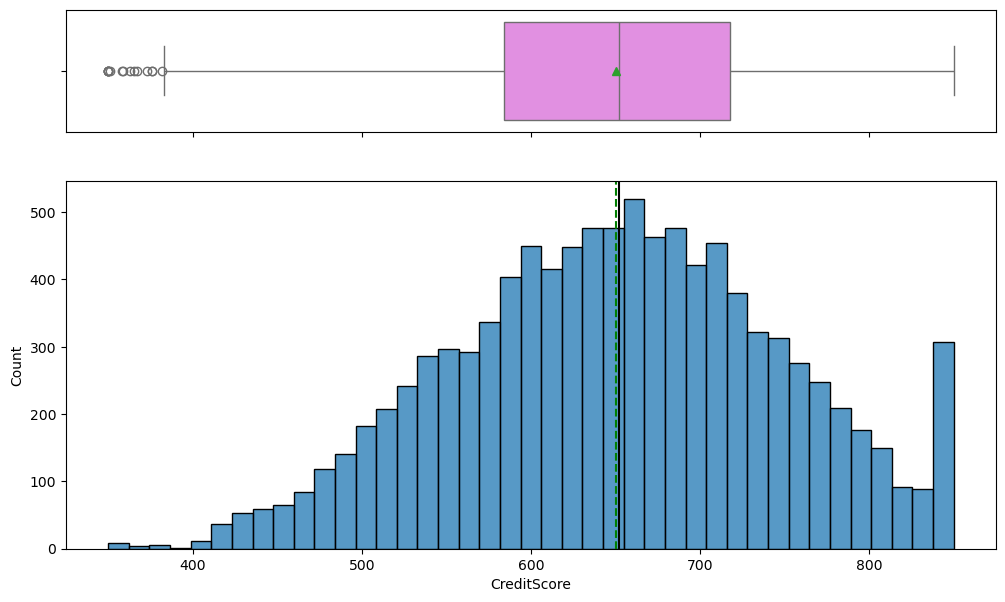

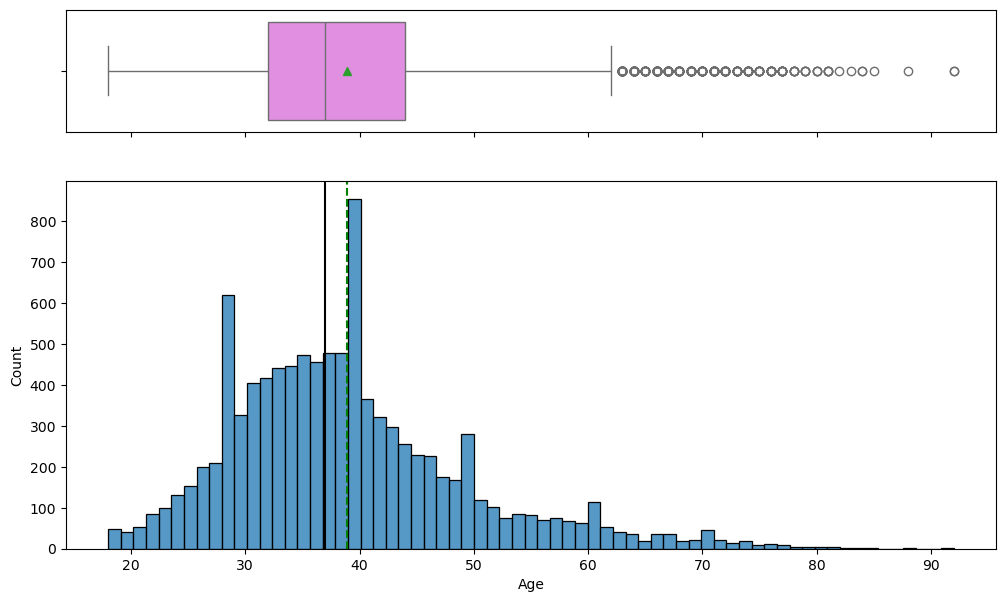

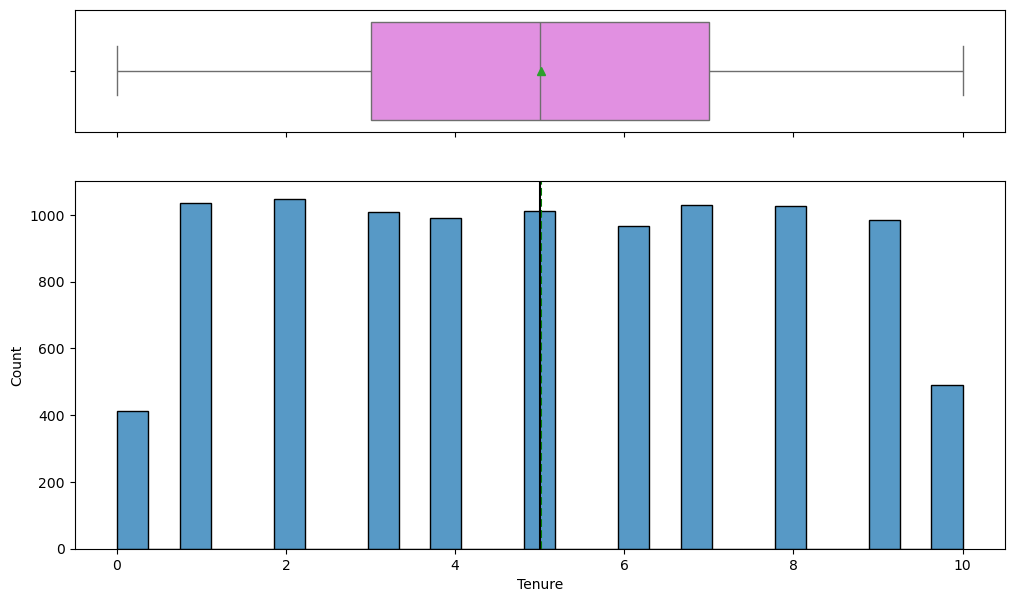

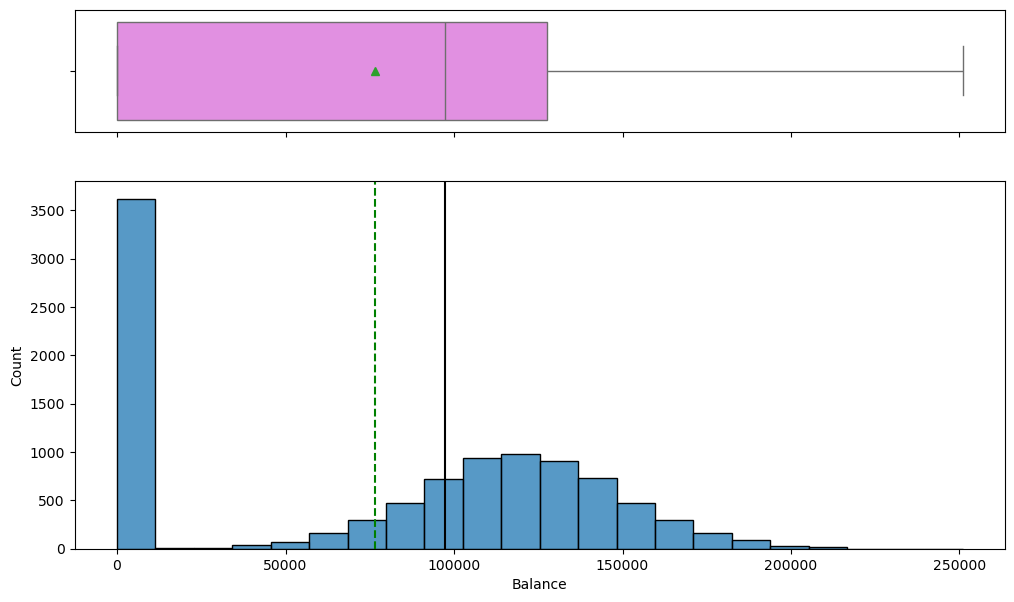

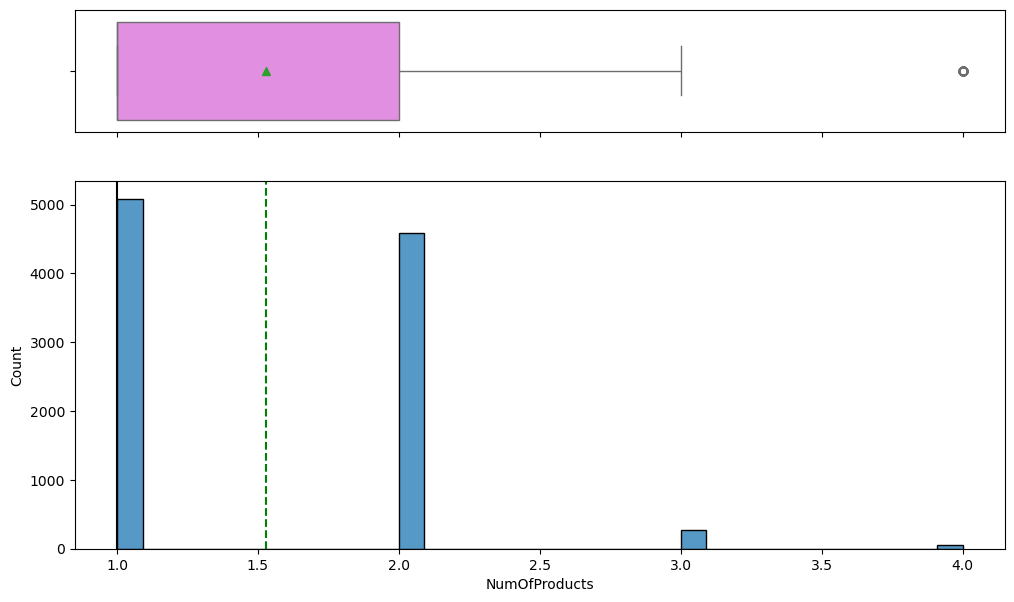

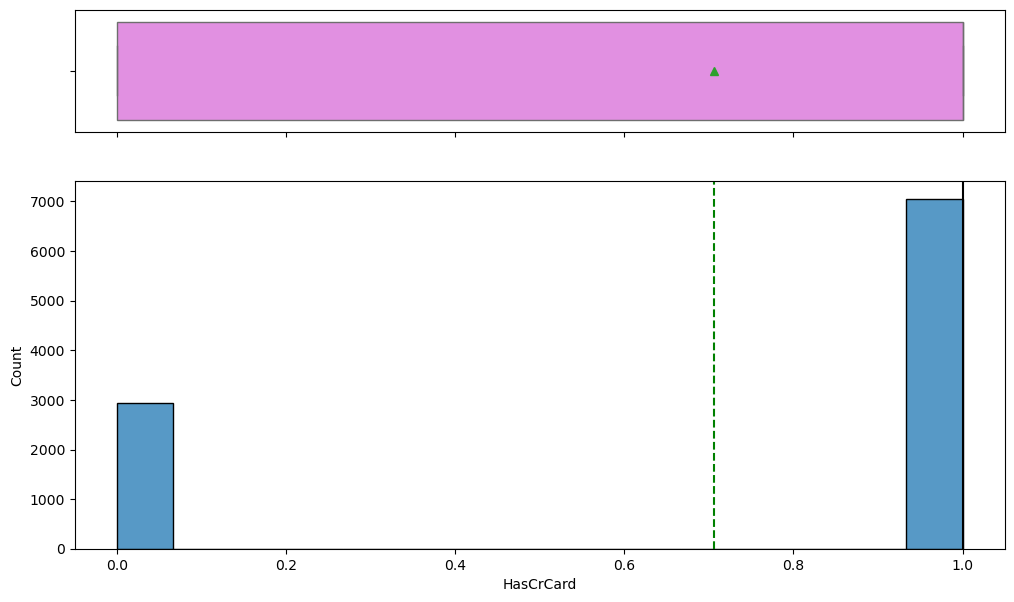

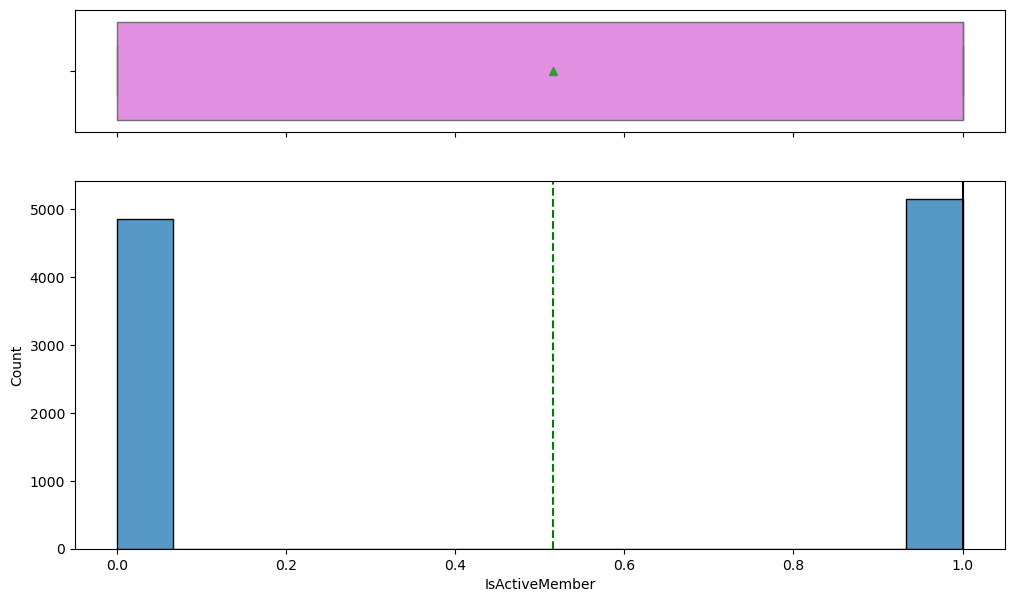

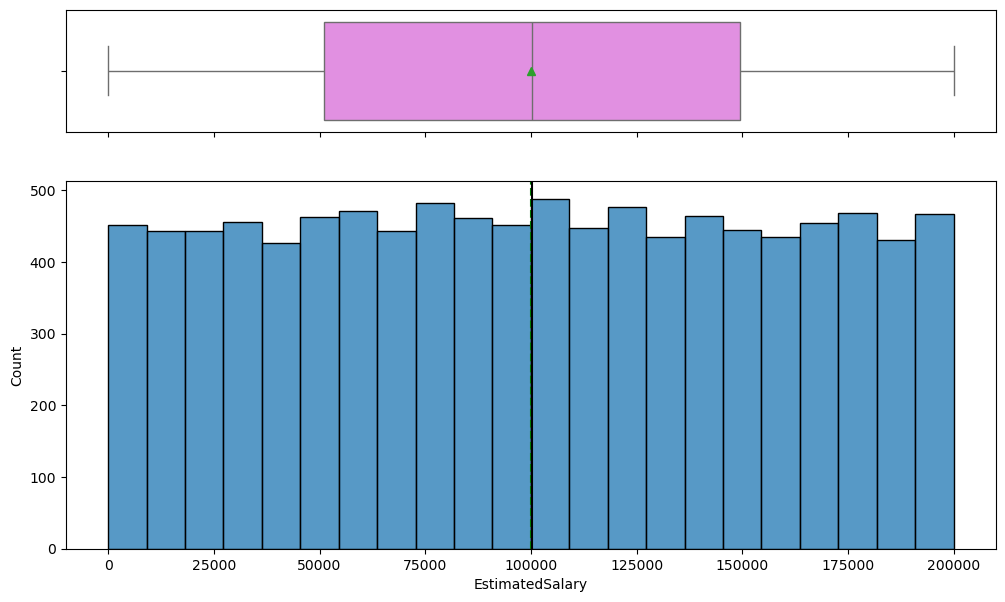

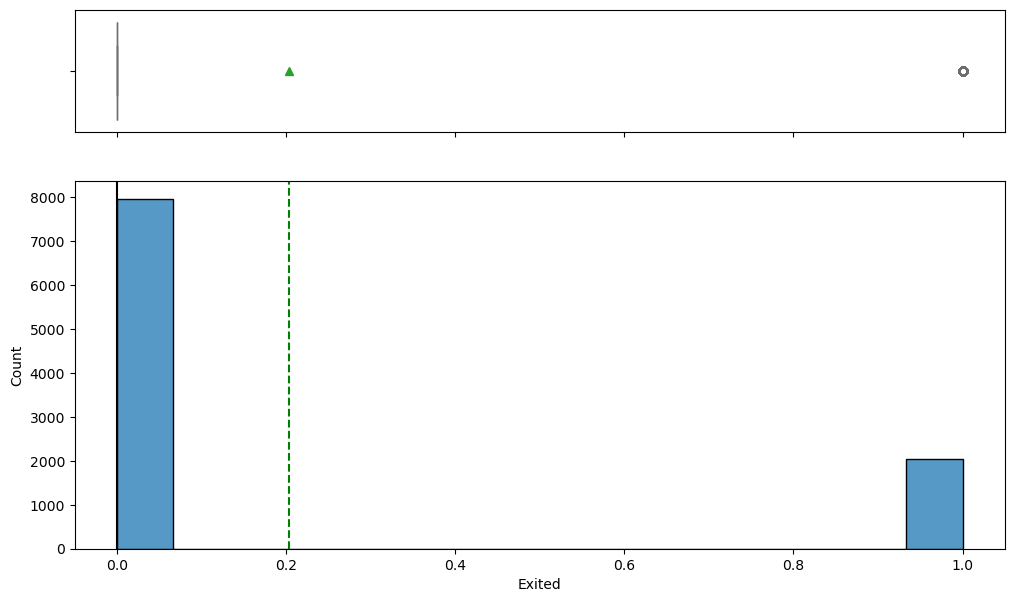

In [20]:
num_cols_list = data.select_dtypes(include=np.number).columns.tolist()
for column in num_cols_list:
    histogram_boxplot(data, column)

### Observations on Univariate Analysis
* There seem to be some outliers in the **CreditScore** column, which is almost expected because it takes time to build a good credit score and all new customers start from a low number. Otherwise, the distribution looks normal.
* There seem to be a few outliers in the **Age** column as well, this as well is expected, because there are not too many customers who are really senior. Otherwise, the distribution looks slightly right-skewed.
* **Tenure** seems categorical in nature and seems to have a normal distribution.
* Customers with **NumOfProducts** being ***4*** seems to outliers, as most of the customers seems to have either ***1*** or ***2*** products.
* Significant number of customers seems to be holding a Credit Card as can be seen in the column **HasCrCard**.
* There seem to be around ***50%*** of users being inactive, which isn't a good sign. An engaged user means a lasting user and an inactive user means an attriting user.
* Around ***20%*** of the customers seems to have attrited the bank based on the provided dataset.

### Bivariate Analysis

### Let's plot a Heatmap for Numerical Columns to see the Correlations

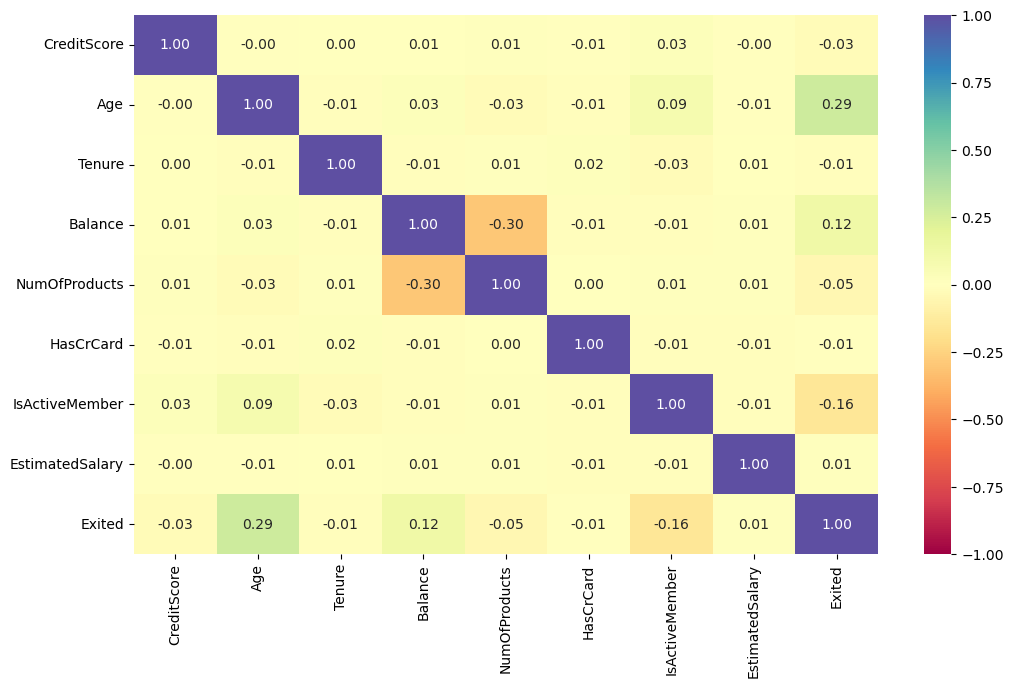

In [21]:
# Let's also perform the Bivariate analysis by plotting Pairplot / Heatmap for the dataframe to show the correlations
plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations on the Heatmap
* Highest positive correlation seems to be between **Age** & **Exited**.
    * Higher the **Age**, higher is the chance of **Attrition**.
* Highest negative correlation seems to be between **NumOfProducts** & **Balance**.
    * Higher the **NumOfProducts** like credit cards, loans, etc., lower is the balance. Which is expected.
* Second highest negative correlation seems to be between **IsActiveMember** and **Exited**.
    * Lower the customer **IsActiveMember**, higher is the chance of attrition.

### Let's now check how different attributes influence the target variable "Exited"

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


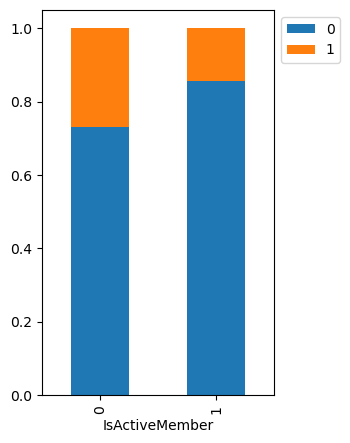

In [22]:
stacked_barplot(data, "IsActiveMember", "Exited")

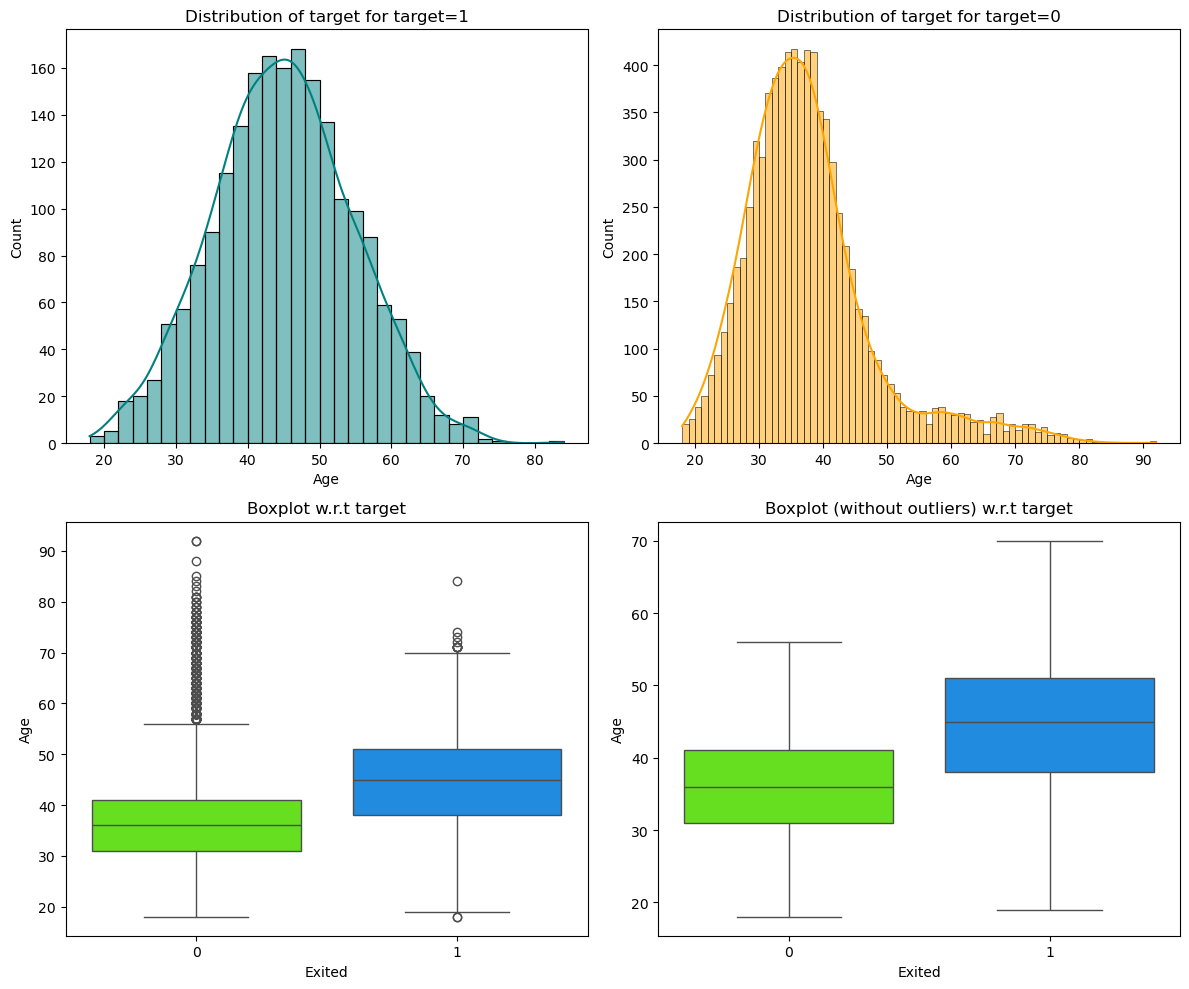

In [23]:
distribution_plot_wrt_target(data, "Age", "Exited")

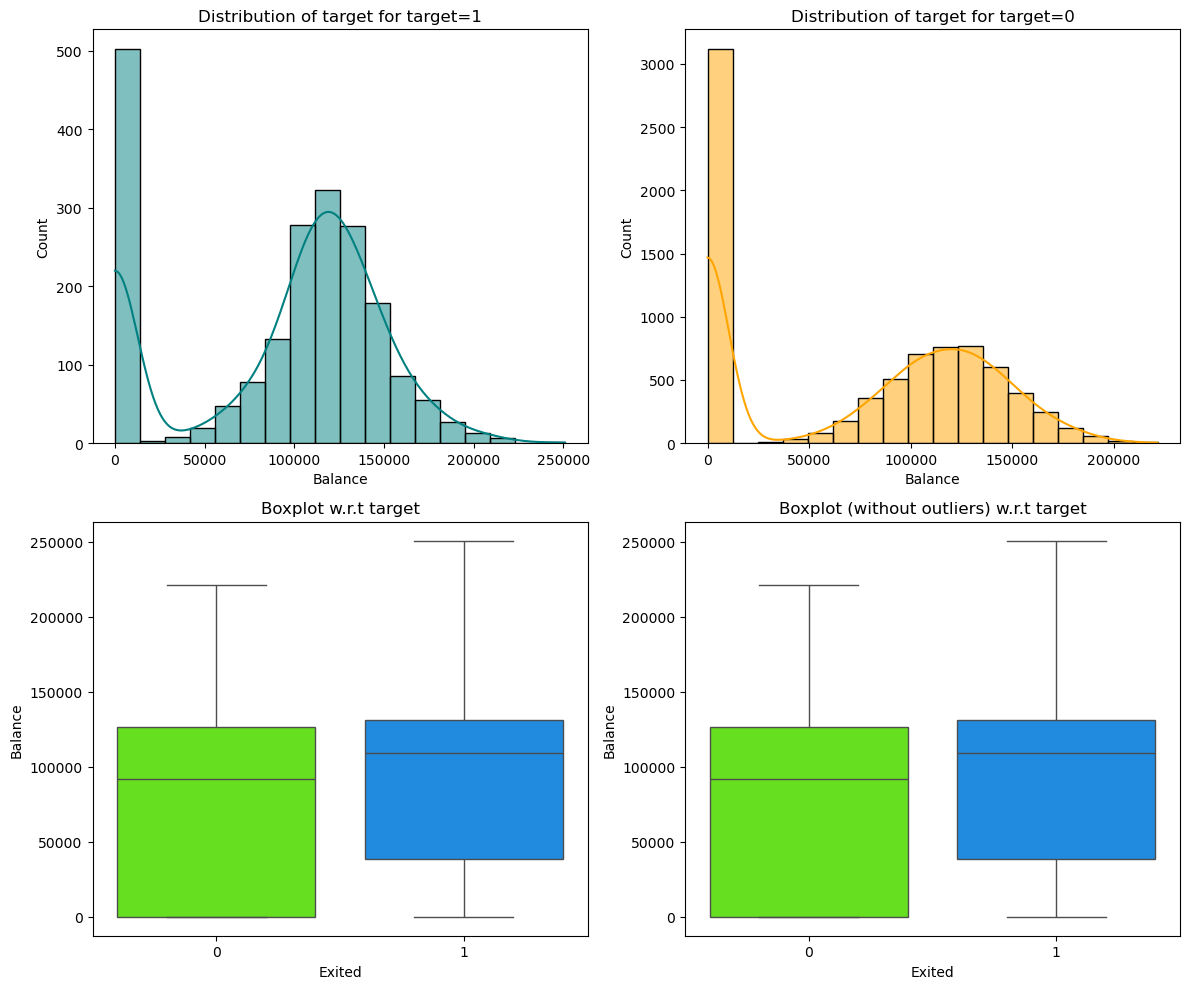

In [24]:
distribution_plot_wrt_target(data, "Balance", "Exited")

### Observations on Bivariate Analysis
* Based on the flag **IsActiveMember**, it is pretty evident that users who tend to be show signs of inactivity have higher tendency to attrite and this might be a good indicator on which customer base to target with some promotional offers, to increase retention.
* We can see that the **Age** is a significant factor in the customers attriting the bank. We can see clearly see that most of the attrited users are between the **Age** of ***40*** - ***50*** and we can see that that is exactly the age when we can see a significant decline in the number of users that stayed with the Bank.
    * Sounds like an indicator that Elder customers are having some significant reasons to leave the Bank. Maybe they don't see any value or benefits that they anticipate to receive. Good area to research.

## Data Preprocessing

### Dummy Variable Creation

In [25]:
# creating dummy variables
data = pd.get_dummies(data, columns=data.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


### Train-validation-test Split

In [27]:
# separating the independent and dependent variables
X = data.drop(["Exited"], axis=1)
y = data["Exited"]

In [28]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say train & temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temp set into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(5000, 11) (3000, 11) (2000, 11)


### Data Normalization

* It involves scaling the input data to ensure that all features have a similar range, typically between 0 and 1 or -1 and 1.
* This process can significantly improve the performance and stability of the neural network during training.

In [29]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Model Building

### Model Evaluation Criterion

#### Let's first define what is False Positive & False Negative in this scenario

* **False Positive**
    * If the neural network predict that the user will attrite, but the user doesn't, then it will be considered False Positive.
* **False Negative**
    * If the neural network predict that the user will not attrite, but the user does, then it will be considered False Negative.

#### Metric of Choice

* Because we are attempting to solve a classification based problem using a neural network, **Accuracy** would be the best metric for monitoring neural network performance, because it is intuitive and straightforward to understand.
* However, the choice of accuracy as a performance metric depends on several factors related to the problem at hand. Here are some reasons why accuracy is used:
    * Accuracy is defined as the ratio of correctly predicted instances to the total instances. It is easy to understand and interpret, making it a go-to metric for initial performance assessment.
    * Accuracy directly measures how often the classifier is correct, which aligns with the goal of many classification tasks, only unless the data is highly imbalanced, which isn't the case here.

### Define Functions for Computing Performance & Building Confusion Matrix
* **Let's define a function to plot loss & accuracy for the different models.**
* **Let's also create a DataFrame to store the performance results of the models we build.**

In [30]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [31]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["#hidden layers","#neurons - hidden layer","activation function - hidden layer ","#epochs","batch size","optimizer","regularization","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

#### Let's set some parameters as default for all models

In [32]:
batch_size = 32
epochs = 50

### Neural Network with SGD Optimizer

#### Model 0

In [33]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [34]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [37]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6783 - loss: 0.5899 - val_accuracy: 0.7967 - val_loss: 0.4586
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.4535 - val_accuracy: 0.8040 - val_loss: 0.4330
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8055 - loss: 0.4315 - val_accuracy: 0.8143 - val_loss: 0.4192
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8139 - loss: 0.4190 - val_accuracy: 0.8200 - val_loss: 0.4108
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8206 - loss: 0.4110 - val_accuracy: 0.8240 - val_loss: 0.4050
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.4050 - val_accuracy: 0.8293 - val_loss: 0.4003
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8331 - loss: 0.3999 - val_accuracy: 0.8337 - val_loss: 0.3962
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8336 - loss: 0.3952 - val_accuracy: 0.

In [38]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.248802185058594


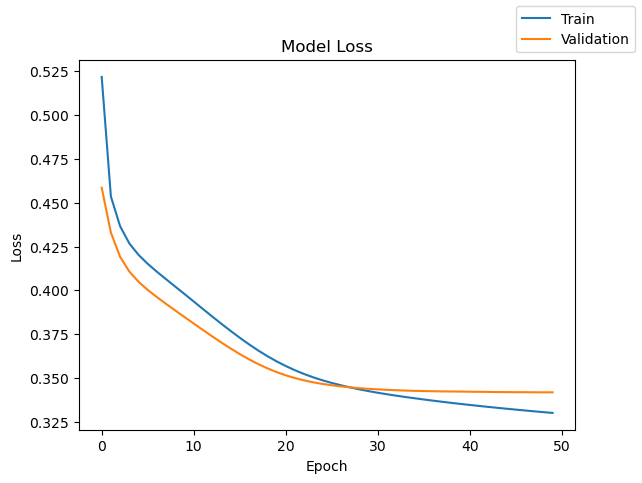

In [39]:
plot(history,'loss')

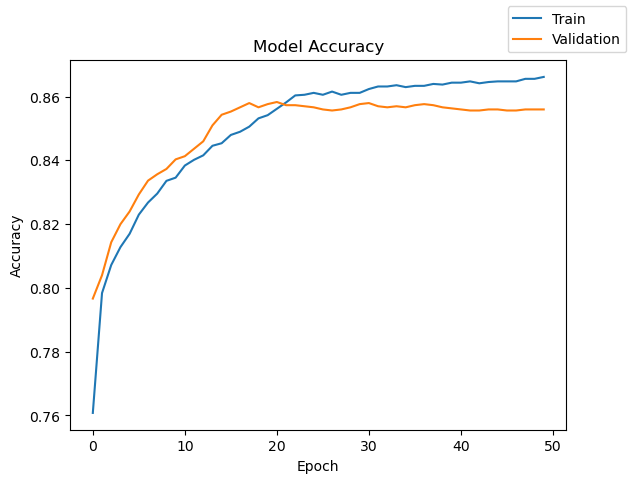

In [40]:
plot(history,'accuracy')

In [41]:
results.loc[0] = [2,[128,64],["relu","tanh"],50,32,"SGD",["-"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

## Model Performance Improvement

#### Model 1
* SGD with Dropout = 0.5
* Learning Rate = 0.0001

In [42]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [43]:
dropout_rate = 0.5  # defining the dropout ratio

In [44]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
lr = 1e-4    # defining the learning rate; 1e-4 is equal to 0.0001
optimizer = keras.optimizers.SGD()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [47]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7148 - loss: 0.5925 - val_accuracy: 0.7963 - val_loss: 0.4790
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7961 - loss: 0.4883 - val_accuracy: 0.7967 - val_loss: 0.4518
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.4671 - val_accuracy: 0.8000 - val_loss: 0.4364
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8076 - loss: 0.4509 - val_accuracy: 0.8077 - val_loss: 0.4263
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4497 - val_accuracy: 0.8133 - val_loss: 0.4198
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4366 - val_accuracy: 0.8150 - val_loss: 0.4153
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8088 - loss: 0.4376 - val_accuracy: 0.8210 - val_loss: 0.4111
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4306 - val_accuracy: 0.

In [48]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.026617288589478


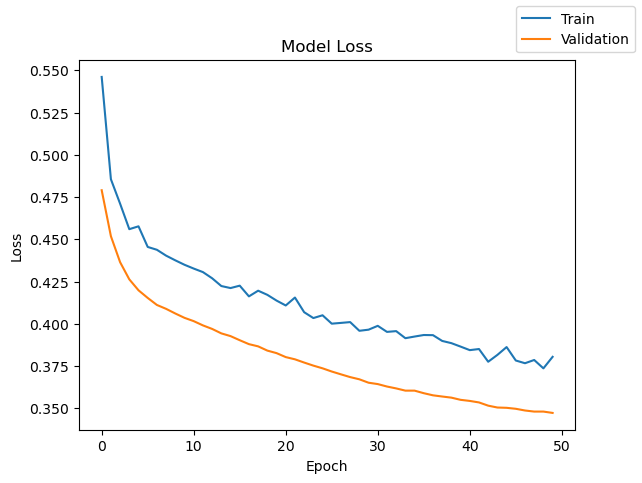

In [49]:
plot(history,'loss')

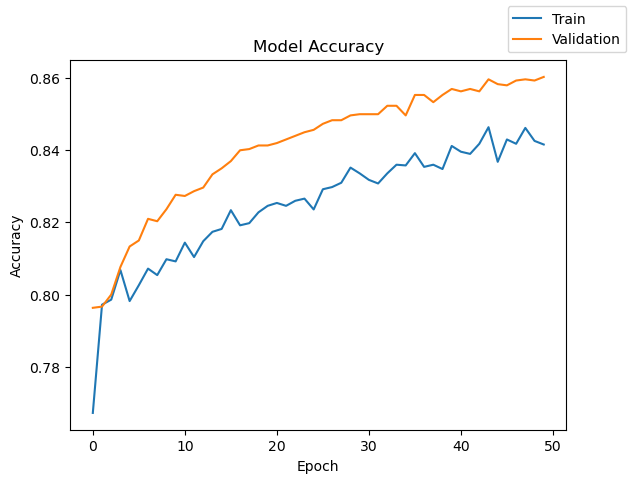

In [50]:
plot(history,'accuracy')

In [51]:
results.loc[1] = [2,[128,64],["relu","tanh"],50,32,"SGD",["LearnRate (.0001)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

### Neural Network with Adam Optimizer

#### Model 2

In [52]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [53]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
optimizer = keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [56]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7497 - loss: 0.5163 - val_accuracy: 0.8333 - val_loss: 0.4041
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 0.3972 - val_accuracy: 0.8487 - val_loss: 0.3684
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8500 - loss: 0.3595 - val_accuracy: 0.8543 - val_loss: 0.3542
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3459 - val_accuracy: 0.8530 - val_loss: 0.3503
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3404 - val_accuracy: 0.8547 - val_loss: 0.3488
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8595 - loss: 0.3367 - val_accuracy: 0.8560 - val_loss: 0.3475
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8601 - loss: 0.3335 - val_accuracy: 0.8563 - val_loss: 0.3464
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3308 - val_accuracy: 0.

In [57]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.442939758300781


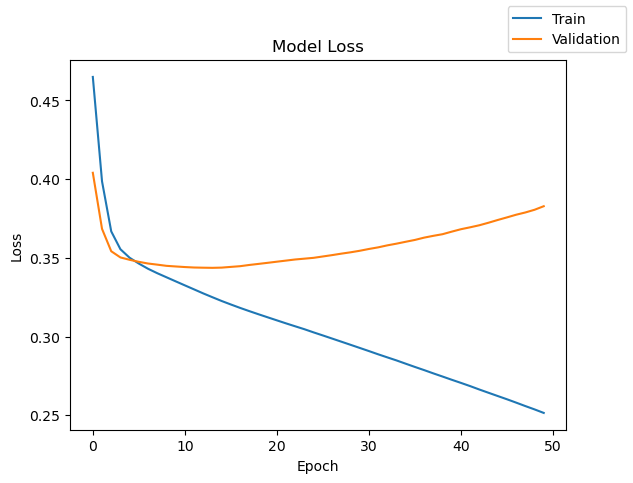

In [58]:
plot(history,'loss')

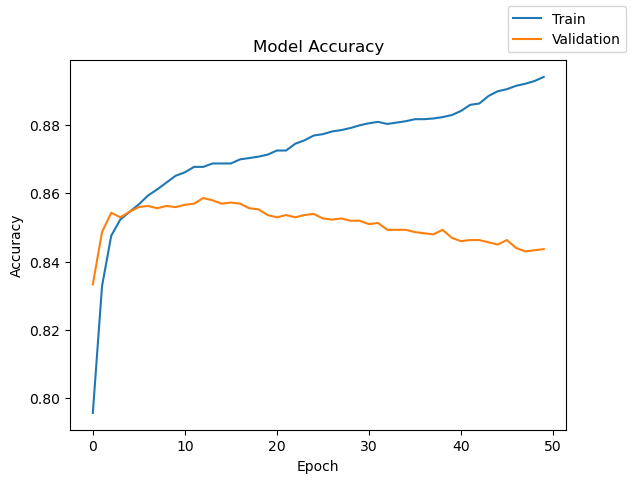

In [59]:
plot(history,'accuracy')

In [60]:
results.loc[2] = [2,[128,64],["relu","tanh"],50,32,"Adam",["-"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

### Neural Network with Adam Optimizer and Dropout

#### Model 3
* Dropout = 0.3

In [61]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [62]:
dropout_rate = 0.3  # defining the dropout ratio

In [63]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [66]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7859 - loss: 0.4773 - val_accuracy: 0.8323 - val_loss: 0.3962
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8263 - loss: 0.4046 - val_accuracy: 0.8457 - val_loss: 0.3709
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8424 - loss: 0.3792 - val_accuracy: 0.8517 - val_loss: 0.3550
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.3705 - val_accuracy: 0.8597 - val_loss: 0.3504
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8491 - loss: 0.3606 - val_accuracy: 0.8587 - val_loss: 0.3461
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3474 - val_accuracy: 0.8593 - val_loss: 0.3442
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3483 - val_accuracy: 0.8593 - val_loss: 0.3415
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3454 - val_accuracy: 0.

In [67]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.828468322753906


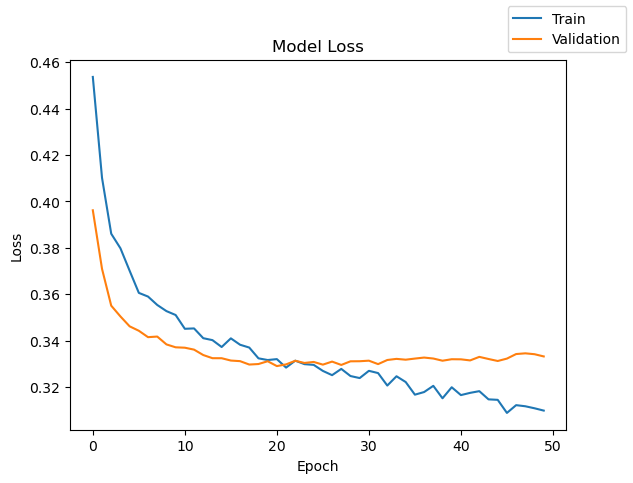

In [68]:
plot(history,'loss')

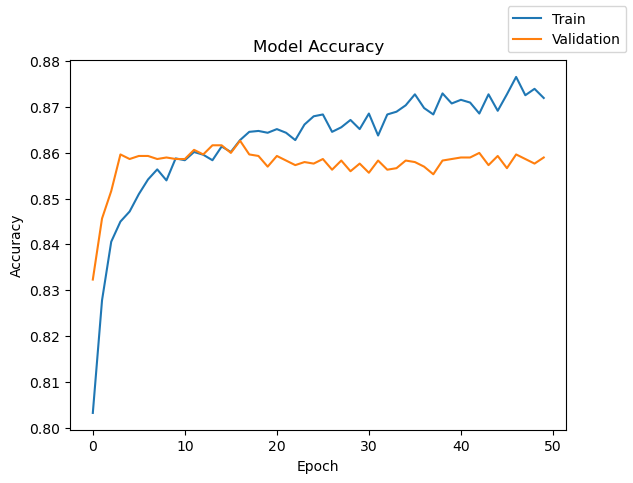

In [69]:
plot(history,'accuracy')

In [70]:
results.loc[3] = [2,[128,64],["relu","tanh"],50,32,"Adam",["Dropout (0.3)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

#### Model 4
* Dropout = 0.4

In [71]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [72]:
dropout_rate = 0.4  # defining the dropout ratio

In [73]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [76]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.4782 - val_accuracy: 0.8270 - val_loss: 0.4069
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8168 - loss: 0.4189 - val_accuracy: 0.8427 - val_loss: 0.3833
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.3928 - val_accuracy: 0.8523 - val_loss: 0.3639
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.3779 - val_accuracy: 0.8570 - val_loss: 0.3529
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.3747 - val_accuracy: 0.8573 - val_loss: 0.3501
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.3625 - val_accuracy: 0.8567 - val_loss: 0.3450
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8496 - loss: 0.3619 - val_accuracy: 0.8540 - val_loss: 0.3430
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8488 - loss: 0.3540 - val_accuracy: 0.

In [77]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.896422147750854


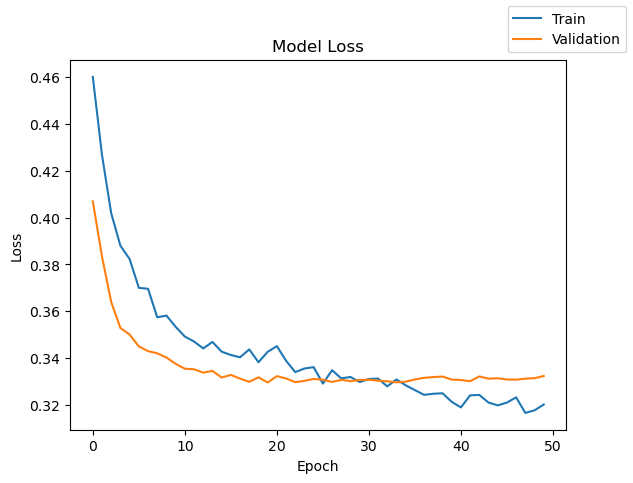

In [78]:
plot(history,'loss')

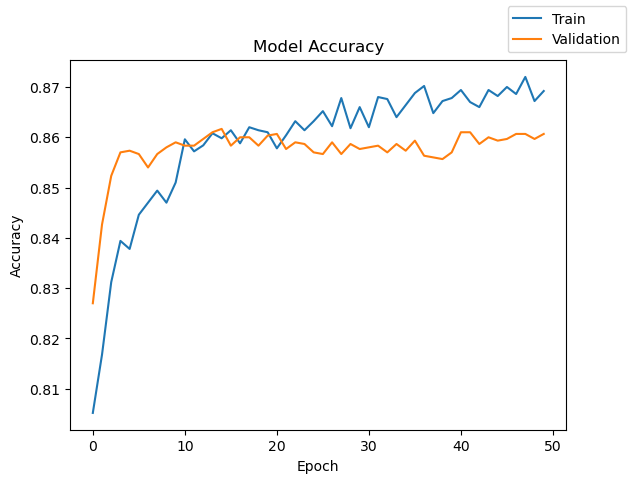

In [79]:
plot(history,'accuracy')

In [80]:
results.loc[4] = [2,[128,64],["relu","tanh"],50,32,"Adam",["Dropout (0.4)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

#### Model 5
* Dropout = 0.5

In [81]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [82]:
dropout_rate = 0.5  # defining the dropout ratio

In [83]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [86]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7610 - loss: 0.5097 - val_accuracy: 0.8150 - val_loss: 0.4108
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4265 - val_accuracy: 0.8333 - val_loss: 0.3884
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - loss: 0.4075 - val_accuracy: 0.8400 - val_loss: 0.3720
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8306 - loss: 0.3923 - val_accuracy: 0.8527 - val_loss: 0.3595
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 0.3720 - val_accuracy: 0.8520 - val_loss: 0.3524
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.3607 - val_accuracy: 0.8563 - val_loss: 0.3475
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3640 - val_accuracy: 0.8570 - val_loss: 0.3447
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.3630 - val_accuracy: 0.

In [87]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.276522874832153


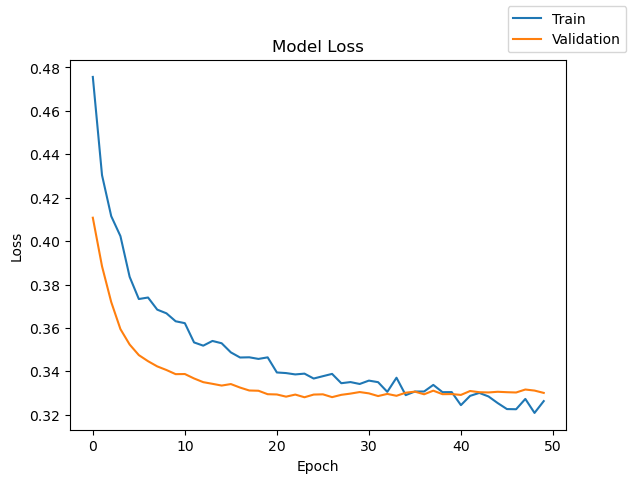

In [88]:
plot(history,'loss')

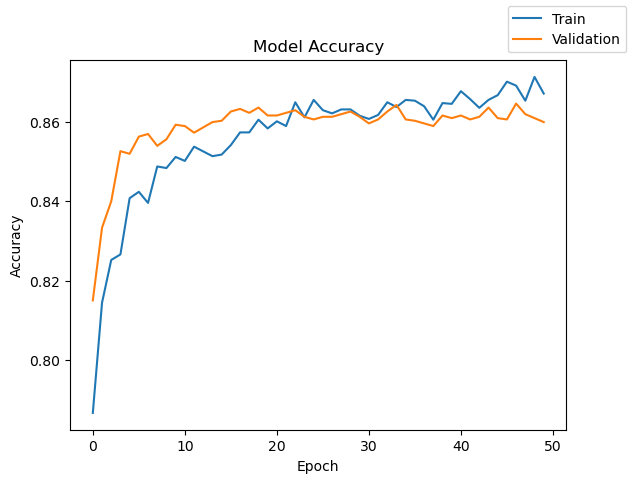

In [89]:
plot(history,'accuracy')

In [90]:
results.loc[5] = [2,[128,64],["relu","tanh"],50,32,"Adam",["Dropout (0.5)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

#### Model 6
* Dropout = 0.4
* Learning Rate = 0.0001

In [91]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [92]:
dropout_rate = 0.5  # defining the dropout ratio

In [93]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [94]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
lr = 1e-4    # defining the learning rate; 1e-4 is equal to 0.0001
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [96]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7234 - loss: 0.5708 - val_accuracy: 0.7963 - val_loss: 0.4723
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.4792 - val_accuracy: 0.7970 - val_loss: 0.4493
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4600 - val_accuracy: 0.8043 - val_loss: 0.4346
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4518 - val_accuracy: 0.8123 - val_loss: 0.4249
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8067 - loss: 0.4380 - val_accuracy: 0.8157 - val_loss: 0.4188
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4370 - val_accuracy: 0.8193 - val_loss: 0.4139
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8104 - loss: 0.4255 - val_accuracy: 0.8213 - val_loss: 0.4107
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8180 - loss: 0.4256 - val_accuracy: 0.

In [97]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.776365518569946


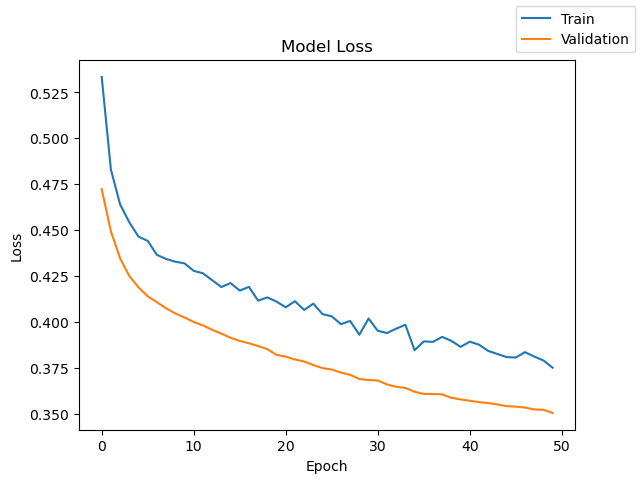

In [98]:
plot(history,'loss')

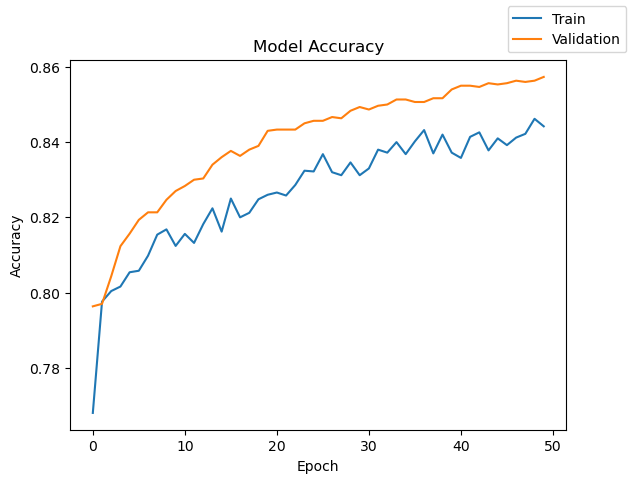

In [99]:
plot(history,'accuracy')

In [100]:
results.loc[6] = [2,[128,64],["relu","tanh"],50,32,"Adam",["Dropout (0.5)","LearnRate (.0001)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

#### Oversampling train data using SMOTE

In [101]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [102]:
print("Before OverSampling, count of '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of '0': {} \n".format(sum(y_train_over == 0)))

Before OverSampling, count of '1': 1019
Before OverSampling, count of '0': 3981 

After OverSampling, count of '1': 1592
After OverSampling, count of '0': 3981 



#### Normalizing Oversampled Train data

In [103]:
# Normalize the Oversampled data
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)

#### Model 7

In [104]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [105]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [106]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
optimizer = keras.optimizers.SGD()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [108]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6511 - loss: 0.6277 - val_accuracy: 0.7997 - val_loss: 0.4655
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7234 - loss: 0.5359 - val_accuracy: 0.8187 - val_loss: 0.4391
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7459 - loss: 0.5125 - val_accuracy: 0.8257 - val_loss: 0.4273
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7538 - loss: 0.5010 - val_accuracy: 0.8263 - val_loss: 0.4201
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7637 - loss: 0.4932 - val_accuracy: 0.8250 - val_loss: 0.4145
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.7693 - loss: 0.4865 - val_accuracy: 0.8270 - val_loss: 0.4094
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7714 - loss: 0.4802 - val_accuracy: 0.8297 - val_loss: 0.4043
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7751 - loss: 0.4739 - val_

In [109]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.992109060287476


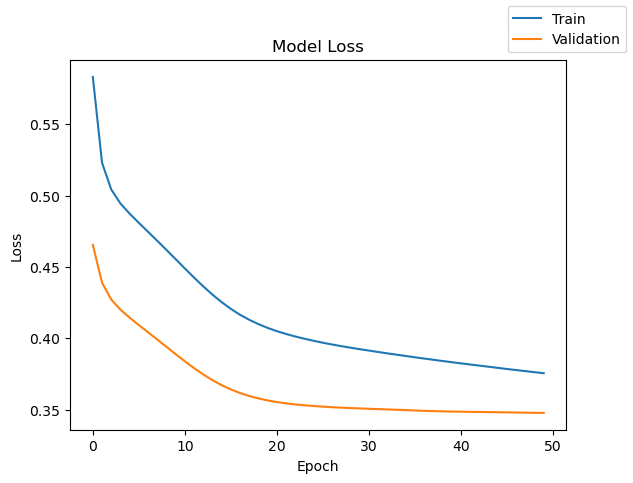

In [110]:
plot(history,'loss')

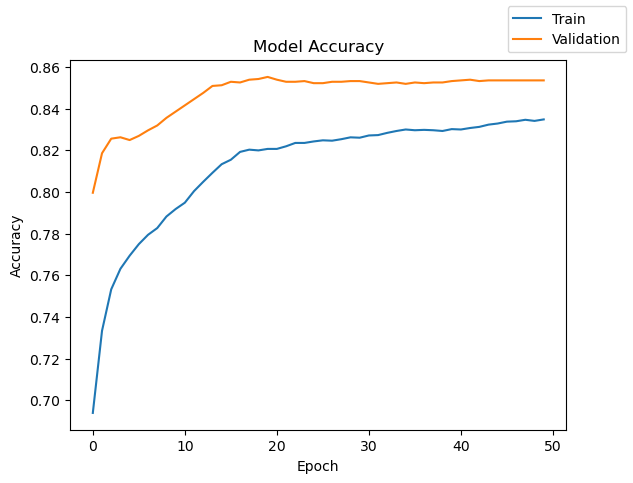

In [111]:
plot(history,'accuracy')

In [112]:
results.loc[7] = [2,[128,64],["relu","tanh"],50,32,"SGD",["SMOTE"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

#### Model 8

In [113]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [114]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [115]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [117]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7271 - loss: 0.5436 - val_accuracy: 0.8417 - val_loss: 0.3823
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.7951 - loss: 0.4536 - val_accuracy: 0.8547 - val_loss: 0.3545
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.8098 - loss: 0.4175 - val_accuracy: 0.8543 - val_loss: 0.3493
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8144 - loss: 0.4048 - val_accuracy: 0.8533 - val_loss: 0.3474
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8199 - loss: 0.3972 - val_accuracy: 0.8543 - val_loss: 0.3458
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8219 - loss: 0.3905 - val_accuracy: 0.8547 - val_loss: 0.3440
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8239 - loss: 0.3841 - val_accuracy: 0.8533 - val_loss: 0.3428
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8259 - loss: 0.3783 - va

In [118]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.718080759048462


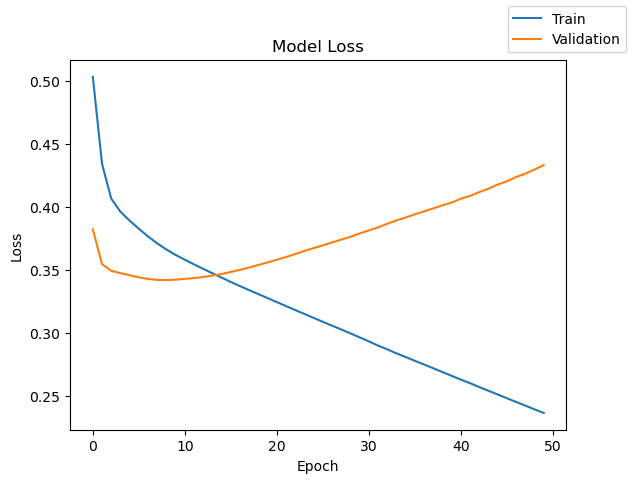

In [119]:
plot(history,'loss')

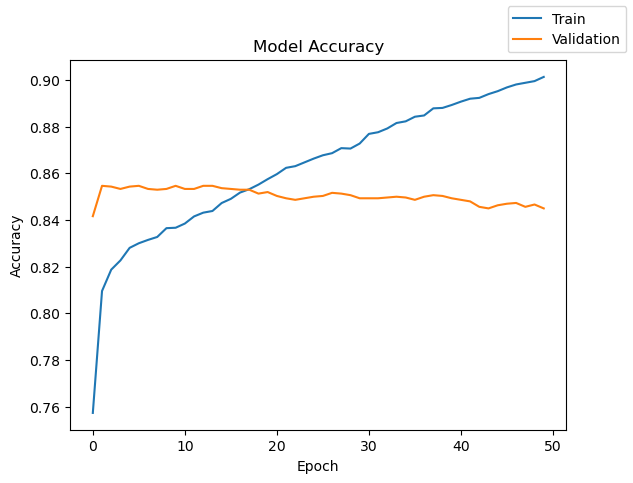

In [120]:
plot(history,'accuracy')

In [121]:
results.loc[8] = [2,[128,64],["relu","tanh"],50,32,"Adam",["SMOTE"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

#### Model 9
* Dropout = 0.3

In [122]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [123]:
dropout_rate = 0.3  # defining the dropout ratio

In [124]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [125]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [127]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7216 - loss: 0.5536 - val_accuracy: 0.8373 - val_loss: 0.3900
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7798 - loss: 0.4786 - val_accuracy: 0.8447 - val_loss: 0.3663
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7956 - loss: 0.4559 - val_accuracy: 0.8530 - val_loss: 0.3519
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - loss: 0.4415 - val_accuracy: 0.8550 - val_loss: 0.3474
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4301 - val_accuracy: 0.8550 - val_loss: 0.3438
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.4176 - val_accuracy: 0.8567 - val_loss: 0.3405
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8087 - loss: 0.4153 - val_accuracy: 0.8550 - val_loss: 0.3393
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8119 - loss: 0.4159 - val_accuracy: 0.

In [128]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.144521236419678


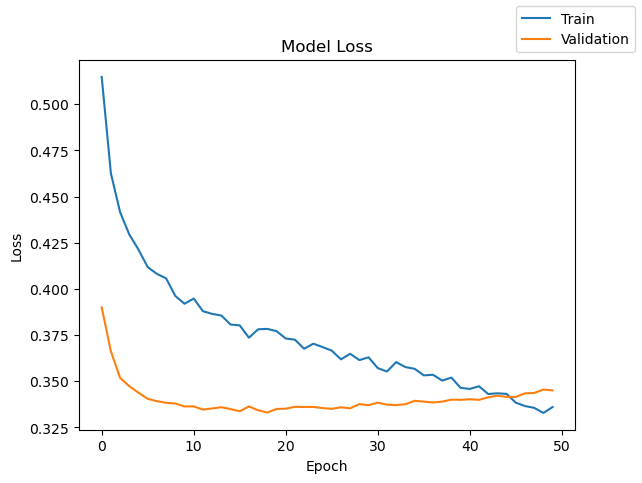

In [129]:
plot(history,'loss')

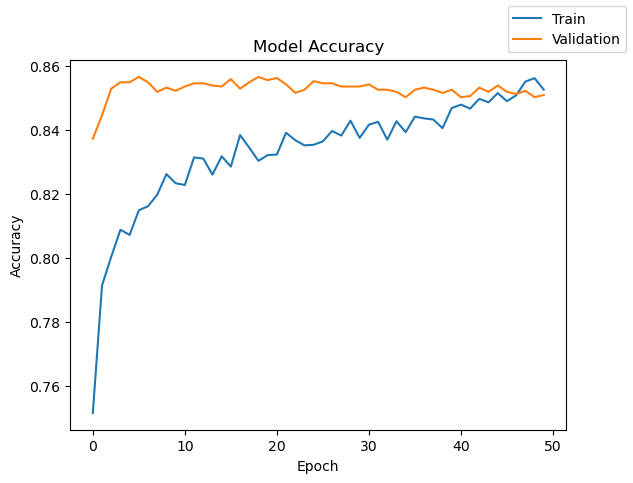

In [130]:
plot(history,'accuracy')

In [131]:
results.loc[9] = [2,[128,64],["relu","tanh"],50,32,"Adam",["SMOTE","Dropout (0.3)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

#### Model 10
* Dropout = 0.4

In [132]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [133]:
dropout_rate = 0.4  # defining the dropout ratio

In [134]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [135]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [137]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7025 - loss: 0.5792 - val_accuracy: 0.8317 - val_loss: 0.4025
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7635 - loss: 0.4999 - val_accuracy: 0.8410 - val_loss: 0.3777
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7828 - loss: 0.4719 - val_accuracy: 0.8450 - val_loss: 0.3606
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7960 - loss: 0.4559 - val_accuracy: 0.8547 - val_loss: 0.3497
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4415 - val_accuracy: 0.8570 - val_loss: 0.3450
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.4274 - val_accuracy: 0.8583 - val_loss: 0.3399
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8015 - loss: 0.4296 - val_accuracy: 0.8560 - val_loss: 0.3404
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8202 - loss: 0.4108 - val_accuracy: 0.

In [138]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.36533522605896


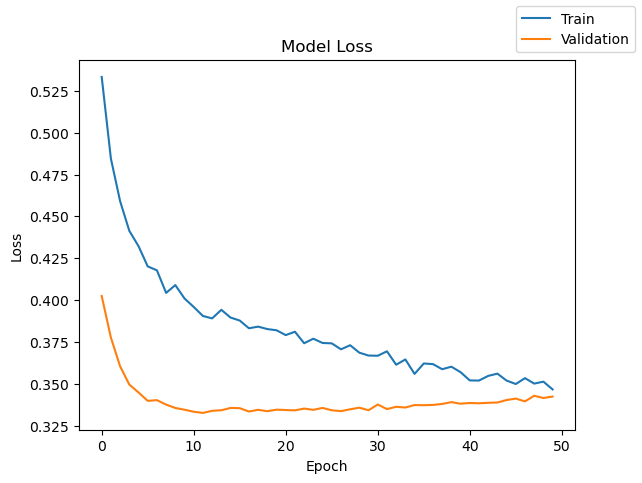

In [139]:
plot(history,'loss')

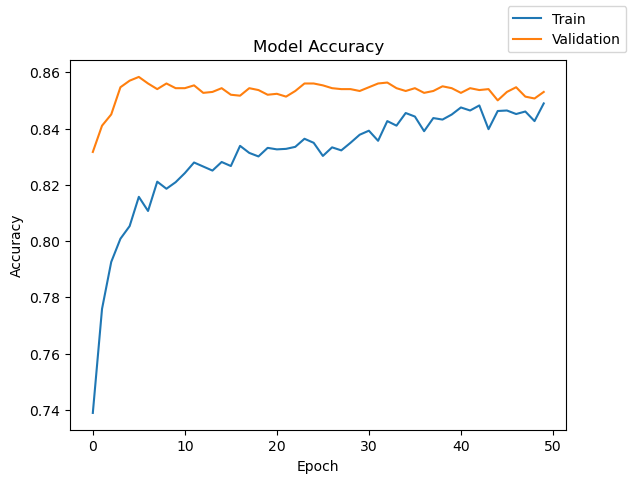

In [140]:
plot(history,'accuracy')

In [141]:
results.loc[10] = [2,[128,64],["relu","tanh"],50,32,"Adam",["SMOTE","Dropout (0.4)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

#### Model 11
* Dropout = 0.5

In [142]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [143]:
dropout_rate = 0.5  # defining the dropout ratio

In [144]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [145]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
optimizer = keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [147]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7086 - loss: 0.5710 - val_accuracy: 0.8217 - val_loss: 0.4074
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7534 - loss: 0.5103 - val_accuracy: 0.8370 - val_loss: 0.3863
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7737 - loss: 0.4812 - val_accuracy: 0.8427 - val_loss: 0.3676
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7870 - loss: 0.4612 - val_accuracy: 0.8513 - val_loss: 0.3572
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.4542 - val_accuracy: 0.8517 - val_loss: 0.3504
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4454 - val_accuracy: 0.8537 - val_loss: 0.3466
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8015 - loss: 0.4386 - val_accuracy: 0.8573 - val_loss: 0.3434
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8032 - loss: 0.4267 - val_accuracy: 

In [148]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.165771007537842


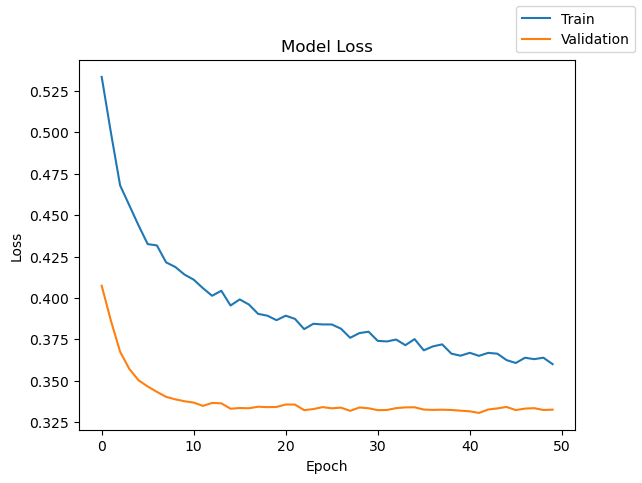

In [149]:
plot(history,'loss')

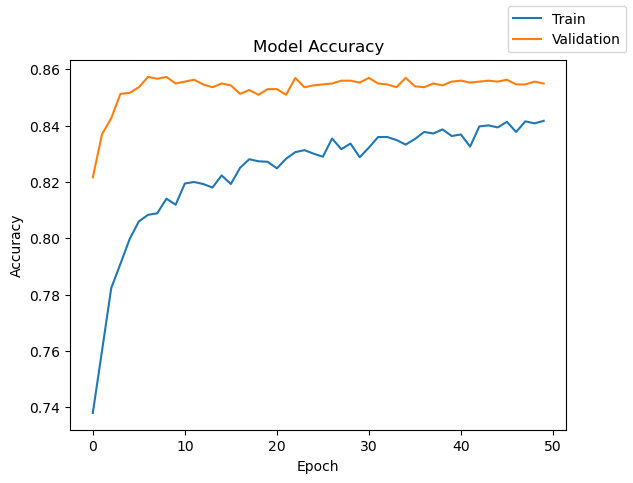

In [150]:
plot(history,'accuracy')

In [151]:
results.loc[11] = [2,[128,64],["relu","tanh"],50,32,"Adam",["SMOTE","Dropout (0.5)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

* 

#### Model 12
* Dropout = 0.5
* Learning Rate = 0.0001

In [152]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [153]:
dropout_rate = 0.5  # defining the dropout ratio

In [154]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [155]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
lr = 1e-4    # defining the learning rate; 1e-4 is equal to 0.0001
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [157]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6464 - loss: 0.6529 - val_accuracy: 0.7963 - val_loss: 0.4862
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7224 - loss: 0.5659 - val_accuracy: 0.8123 - val_loss: 0.4515
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7314 - loss: 0.5481 - val_accuracy: 0.8213 - val_loss: 0.4377
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7365 - loss: 0.5334 - val_accuracy: 0.8203 - val_loss: 0.4308
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7482 - loss: 0.5321 - val_accuracy: 0.8203 - val_loss: 0.4253
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7470 - loss: 0.5244 - val_accuracy: 0.8200 - val_loss: 0.4225
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7517 - loss: 0.5136 - val_accuracy: 0.8237 - val_loss: 0.4178
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7455 - loss: 0.5148 - val_accuracy: 0.

In [158]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.307981491088867


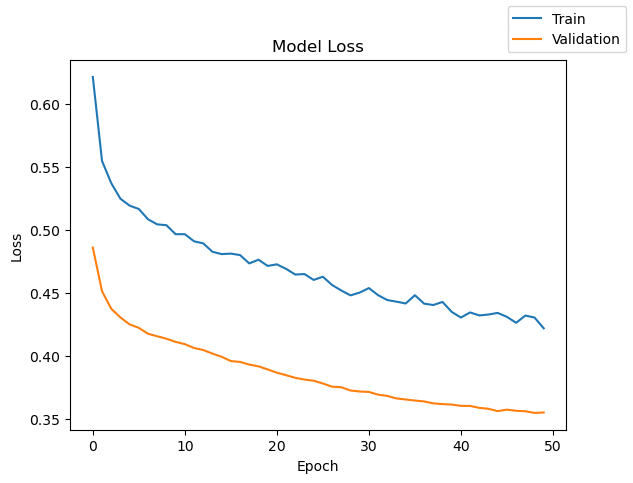

In [159]:
plot(history,'loss')

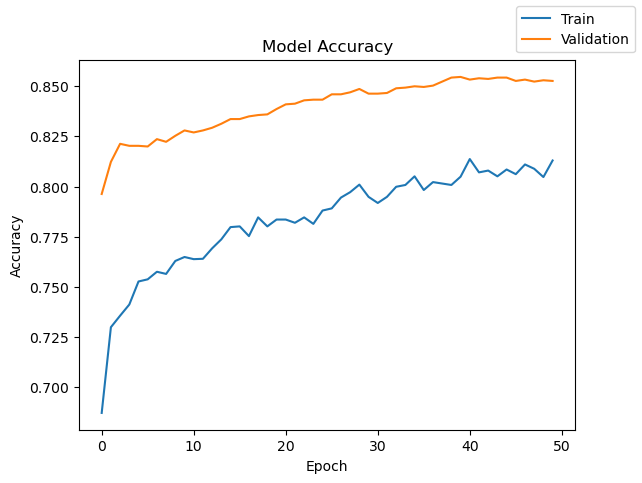

In [160]:
plot(history,'accuracy')

In [161]:
results.loc[12] = [2,[128,64],["relu","tanh"],50,32,"Adam",["SMOTE","Dropout (0.5)","LearnRate (.0001)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

### Observations on different Neural Networks
* Based on the Loss & Accuracy plots for different models we developed, we can see the following trends:
    * When using Stochastic Gradient Descent (SGD) optimizer, the loss plot was pretty smooth, but the accuracy plot had shorter jagged lines.
    * In case of Adam optimizer, we could see that both loss plots & accuracy plots had pretty tall & sharp jagged lines.
        * We were able to make it smoother by slowing the learning rate to 0.0001
        * We were also able to improve performance of these neural networks by introducing Dropouts.
    * We could see that SGD optimized models took lesser time than the Adam optimized models in general.
        * It got even worse when using the synthesized data using SMOTE in the train set.
        * And even though we ended up increasing the time taken, we were not really seeing any significant improvements either.

## Model Performance Comparison and Final Model Selection

#### Let's compare performances of different models
* We have been collecting the passed parameters and the metrics information for each model in the **results** dataframe. Let's take a look at it:

In [162]:
results

,#hidden layers,#neurons - hidden layer,activation function - hidden layer,#epochs,batch size,optimizer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,SGD,[-],0.330085,0.341836,0.866200,0.856000,10.25
1,2,"[128, 64]","[relu, tanh]",50,32,SGD,[LearnRate (.0001)],0.380421,0.347231,0.841600,0.860333,11.03
2,2,"[128, 64]","[relu, tanh]",50,32,Adam,[-],0.251514,0.382830,0.894200,0.843667,11.44
3,2,"[128, 64]","[relu, tanh]",50,32,Adam,[Dropout (0.3)],0.309767,0.333137,0.872000,0.859000,11.83
4,2,"[128, 64]","[relu, tanh]",50,32,Adam,[Dropout (0.4)],0.320222,0.332400,0.869200,0.860667,11.90
5,2,"[128, 64]","[relu, tanh]",50,32,Adam,[Dropout (0.5)],0.326342,0.330112,0.867200,0.860000,11.28
6,2,"[128, 64]","[relu, tanh]",50,32,Adam,"[Dropout (0.5), LearnRate (.0001)]",0.375002,0.350351,0.844200,0.857333,10.78
7,2,"[128, 64]","[relu, tanh]",50,32,SGD,[SMOTE],0.375658,0.347885,0.834918,0.853667,9.99
8,2,"[128, 64]","[relu, tanh]",50,32,Adam,[SMOTE],0.236154,0.433418,0.901310,0.845000,10.72
9,2,"[128, 64]","[relu, tanh]",50,32,Adam,"[SMOTE, Dropout (0.3)]",0.336092,0.345085,0.852683,0.851000,11.14


#### Best Model
* Based on the train & validation accuracy scores and the amount of time taken (& complexity), we can see that **Neural Network with SGD Optimizer** having **Learning Rate** of ***0.0001*** seems to be giving the best performance.
    * This is the model with one among the least complexity & takes among the least time.
    * Also, this model seems to be one among the least overfitting.
* Now, we can evaluate the performance of this model against the unseen dataset (test) as well.
* **Disclaimer**: I tried to evaluate the performance of all different models on the test dataset (*after clearing the cache each time*) and **SGD with lowered Learning Rate** seemed to perform best out of all.

#### Let's now evaluate the performance of the selected model on unseen test data.

In [163]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [164]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation ="sigmoid"))

In [165]:
lr = 1e-4    # defining the learning rate; 1e-4 is equal to 0.0001
optimizer = keras.optimizers.SGD (learning_rate=lr)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [166]:
model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5185 - loss: 0.7061 - val_accuracy: 0.5487 - val_loss: 0.6940
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.5680 - loss: 0.6872 - val_accuracy: 0.5910 - val_loss: 0.6764
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.6089 - loss: 0.6701 - val_accuracy: 0.6300 - val_loss: 0.6604
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.6456 - loss: 0.6546 - val_accuracy: 0.6637 - val_loss: 0.6458
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6723 - loss: 0.6404 - val_accuracy: 0.6920 - val_loss: 0.6326
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.6907 - loss: 0.6276 - val_accuracy: 0.7123 - val_loss: 0.6206
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.7133 - loss: 0.6159 - val_accuracy: 0.7243 - val_loss: 0.6096
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7287 - loss: 0.6053 - val_

In [167]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7390 - loss: 0.5441
Test Loss: 0.5295886397361755
Test Accuracy: 0.7599999904632568


## Actionable Insights and Business Recommendations

* We have identified the model which gives the best performance among everything else on the test dataset. 
    * Which means that this neural network can make predictions with ~79% accuracy about a user attriting the bank.
#### Setting the Evaluation Requirements / Priorities
* Based on the model performance, if the model predicts a hundred users would attrite, then there is a high probability that 80 of those users are actually planning to attrite and others might be on the fence.
    * So, it is safe to classify all those customers as attriting customers.
    * Even if there are any False Positives, the user wouldn't have attrited but would end up getting the benefits an attriting customer would have gotten, which wouldn't do any harm.
    * But, not targeting an actually attriting customer would result in revenue loss.
    * So, our model needs to be more tolerant towards False Positives.
#### Areas of Interest
* Also, based on the the EDA, there are areas of interest that we can highlight for the Bank, for them to work on to reduce attrition:
    * There seem to be around 50% of users being inactive, which isn't a good sign. An engaged user means a lasting user and an inactive user means an attriting user.
        * So, upon signs of prolonged inactivity, users should be prompted to stay active by introducing schemes like quarterly cashback offers, which changes each quarter and users need to sign-in and activate such offers each quarter or loose the benefits.
            * This will keep them active and reduce their chances of attrition.
    * Elder customers are having some significant reasons to leave the Bank. Maybe they don't see any value or benefits that they anticipate to receive. Good area to research.
        * New programs / schemes should be introduced by the Bank to engage and reward the senior customer base of the bank, for them to feel valued for their legacy & tenure.

<font size=6 color='blue'>Power Ahead</font>
___